## Bank Telemarketing


### Problem statement:

A money-free bank conducts a telemarketing campaign every three months to promote its term deposit product to customers. Unfortunately, the previous campaign's results did not fulfil their anticipations. The marketing director wants to start a new campaign again. To do so, they'll need a thorough analysis of previous campaigns' customer behavior. Following that, the bank can concentrate its marketing efforts on such customers. This would not only help the bank to better secure deposits, but it would also improve customer happiness by minimizing unwanted marketing for specific customers.

### Objective:

As a data scientist, you must analyse the data provided to identify which factors have a significant impact on customers' deposits and then develop a predictive model that can predict whether or not customers will subscribe to a term deposit. Figure out which customers did not deposit, even though we contacted them multiple times and took the necessary steps to ensure they did not even want to make a term deposit.


### Data Description

The data contains the different attributes of customers' term deposit. The detailed data dictionary is given below.


**Data Dictionary**

1. customer_id: unique customer ID 
2. email_id: email ID of a customer
3. first_name: first name of the customer
4. last_name: last name of the customer
5. age: age of a customer
6. job: type of job (admin,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown)
7. marital_status: marital status (divorced, married, single, unknown) 
8. education: education (basic_4y,basic_6y,basic_9y,high_school,illiterate,professional_course,university_degree,unknown)
9. defaulter: has credit in default (yes,unknown,no)
10. home_loan: customer has home loan? (yes,no,unknown)
11. personal_loan: customer has personal loan? (yes,no,unknown)
12. communication_type: customer contact communication type (cellular, telephone)
13. last_contacted: customer last contacted month (mar,apr,may,jun,jul,aug,sep,oct,nov,dec)
14. day_of_week: last contact day of the week (mon,tue,wed,thu,fri)
15. duration: last contact duration in seconds
16. cc_contact_freq: number of contacts performed in the current campaign.
17. days_since_pc: number of days that passed by after the client was last contacted from a previous campaign.
18. pc_contact_freq: number of contacts performed before this campaign.
19. pc_outcome: previous campaign outcome (failure, nonexistent, success)
20. consumer_price_index: consumer price index 
(example: When the CPI is rising it means that consumer prices are also rising, and when it falls it means consumer prices are generally falling. In short, a higher CPI indicates higher inflation, while a falling CPI indicates lower inflation, or even deflation)
21. euro_interbank_offer_rate:  Euro Interbank Offer Rate (It is a reference rate that is constructed from the average interest rate at which eurozone banks offer unsecured short-term lending on the inter-bank market)
22. subscribed: has the customer subscribed a term deposit? (yes, no)

#### Note: cc refers to current campaign,pc refers to previous campaign.
#### Note: If you stuck at somewhere , refer MLS session and videos.

## Importing necessary libraries and data

In [1]:
# To filter the warnings
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split


# To build linear model for statistical analysis and prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant


# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer
)


# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To perform statistical analysis
import scipy.stats as stats

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

## Data Overview

- Observations
- Shape of the data
- Data types
- Description

In [2]:
# load data Bank_Telemarketing.csv
data = pd.read_csv("Bank_Telemarketing.csv")

# Check the data
data

,customer_id,email_id,first_name,last_name,age,job,marital_status,education,defaulter,home_loan,...,last_contacted,day_of_week,duration,cc_contact_freq,days_since_pc,pc_contact_freq,pc_outcome,consumer_price_index,euro_interbank_offer_rate,subscribed
0,61e41ab36fb571a283ba252b,jared84@example.org,Aaron,Austin,56,housemaid,married,basic.4y,no,no,...,may,mon,261,1,0,0,nonexistent,93.994,4.857,no
1,61e41ab36fb571a283ba252c,gsanchez@example.net,Aaron,Gray,57,services,married,high.school,unknown,no,...,may,mon,149,1,0,0,nonexistent,93.994,4.857,no
2,61e41ab36fb571a283ba252d,donald41@example.net,Aaron,Walker,37,services,married,high.school,no,yes,...,may,mon,226,1,0,0,nonexistent,93.994,4.857,no
3,61e41ab36fb571a283ba252e,ariel87@example.com,Aaron,Shelton,40,admin.,married,basic.6y,no,no,...,may,mon,151,1,0,0,nonexistent,93.994,4.857,no
4,61e41ab36fb571a283ba252f,thomasjeff@example.com,Aaron,Johnson,56,services,married,high.school,no,no,...,may,mon,307,1,0,0,nonexistent,93.994,4.857,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41178,61e41ab76fb571a283bac60a,davidadkins@example.net,Roger,Kim,73,retired,married,professional.course,no,yes,...,nov,fri,334,1,0,0,nonexistent,94.767,1.028,yes
41179,61e41ab76fb571a283bac60b,kristyashley@example.com,Roger,Wilson,46,blue-collar,married,professional.course,no,no,...,nov,fri,383,1,0,0,nonexistent,94.767,1.028,no
41180,61e41ab76fb571a283bac60c,saraholson@example.net,Roger,Price,56,retired,married,university.degree,no,yes,...,nov,fri,189,2,0,0,nonexistent,94.767,1.028,no
41181,61e41ab76fb571a283bac60d,cordovajoyce@example.org,Roger,Bowers,44,technician,married,professional.course,no,no,...,nov,fri,442,1,0,0,nonexistent,94.767,1.028,yes


### Shape of the data

In [3]:
# Checking the number of rows and columns of data
data.shape

(41183, 22)

**Observations:**   

* Dataframe has 41183 rows and 22 columns

In [4]:
# checking for unique values 
data.nunique()

customer_id                  41183
email_id                     38279
first_name                     562
last_name                     1000
age                             77
job                             12
marital_status                   4
education                        8
defaulter                        3
home_loan                        3
personal_loan                    3
communication_type               2
last_contacted                  10
day_of_week                      5
duration                      1544
cc_contact_freq                 42
days_since_pc                   26
pc_contact_freq                  8
pc_outcome                       3
consumer_price_index            26
euro_interbank_offer_rate      316
subscribed                       2
dtype: int64

**Observations:**   
* Number of email_id does not match customer_id  significantly (38279 vs 41183)  as it would be supposed. However, it seems this is issue of example as "print(data['email_id'].value_counts())" would show us that emails were built by specific pattern (first letter of name, surname etc)

* Number of unique customer_id is equal to number of rows. This means that there is no duplicates (at least in customer_id). Therefore, we may drop this column

In [5]:
# Dropping the customer_id
data.drop(["customer_id"], axis=1, inplace=True)
data.drop(["email_id"], axis=1, inplace=True)

data.drop(["first_name"], axis=1, inplace=True)
data.drop(["last_name"], axis=1, inplace=True)

data

,age,job,marital_status,education,defaulter,home_loan,personal_loan,communication_type,last_contacted,day_of_week,duration,cc_contact_freq,days_since_pc,pc_contact_freq,pc_outcome,consumer_price_index,euro_interbank_offer_rate,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,0,0,nonexistent,93.994,4.857,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,0,0,nonexistent,93.994,4.857,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,0,0,nonexistent,93.994,4.857,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,0,0,nonexistent,93.994,4.857,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,0,0,nonexistent,93.994,4.857,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41178,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,0,0,nonexistent,94.767,1.028,yes
41179,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,0,0,nonexistent,94.767,1.028,no
41180,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,0,0,nonexistent,94.767,1.028,no
41181,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,0,0,nonexistent,94.767,1.028,yes


### Data types


In [6]:
# Checking the Data types (Dtypes)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41183 entries, 0 to 41182
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        41183 non-null  int64  
 1   job                        41183 non-null  object 
 2   marital_status             41183 non-null  object 
 3   education                  41183 non-null  object 
 4   defaulter                  41183 non-null  object 
 5   home_loan                  41183 non-null  object 
 6   personal_loan              41183 non-null  object 
 7   communication_type         41183 non-null  object 
 8   last_contacted             41183 non-null  object 
 9   day_of_week                41183 non-null  object 
 10  duration                   41183 non-null  int64  
 11  cc_contact_freq            41183 non-null  int64  
 12  days_since_pc              41183 non-null  int64  
 13  pc_contact_freq            41183 non-null  int

**Observations:**   

* All columns have 41 183 non-null values corresponding to the rows number. This testifies about completeness of dataframe but as we will see later there are unknown values 
* It seems that there is no Dtype issues (when numerical column has object Dtype)
* Several columns (as the defaulter, home_loan etc) are type of yes/no. May be we would need to convert them in numerical types


In [7]:
# for feature in data.columns: # Loop through all columns in the dataframe
#     if data[feature].dtype == 'object': # Only apply for columns with categorical strings
#         data[feature] = pd.Categorical(data[feature])# Replace strings with an integer
# data.head(10)

### Description

In [8]:
# Checking the description
data.describe()

,age,duration,cc_contact_freq,days_since_pc,pc_contact_freq,consumer_price_index,euro_interbank_offer_rate
count,41183.000000,41183.000000,41183.000000,41183.000000,41183.000000,41183.000000,41183.000000
mean,40.026856,258.265376,2.567637,0.221014,0.172765,93.575826,3.621628
std,10.418794,259.270273,2.770166,1.348670,0.494587,0.578689,1.734283
min,18.000000,0.000000,1.000000,0.000000,0.000000,92.201000,0.634000
25%,32.000000,102.000000,1.000000,0.000000,0.000000,93.075000,1.344000
50%,38.000000,180.000000,2.000000,0.000000,0.000000,93.749000,4.857000
75%,47.000000,319.000000,3.000000,0.000000,0.000000,93.994000,4.961000
max,98.000000,4918.000000,56.000000,27.000000,7.000000,94.767000,5.045000


**Observations:**   

* Mean age of customers is 40 years with std 10.4 years. The oldest customer has 98 years 
* It is interesting that mean and std of contact duration are almost the same - 259 seconds. At least one high outlier (4918 s) is present 
* In average, a customer in the current campain is contacted 2.56 times (std 2.77). At least one customer was contacted 56 times! 

* Since last campgain, only 0.22 days passed in average. So it seems the current campaign actually continues the previous one? The highest difference  between previous and current contact is 27 days

* In previous camapgain customers were contacted less frequantly: 0.17 vs 2.56 in average and 7 vs 56 as the highest frequancy. 

* In previous and current campagn, there are minimum contact frequancy equaling to a zero. This means that some custmers were note contacted.

* Consumer price index are very close to each other for their mean, max, 25%, 50% 75% values. Std is only 0.57 

* the euro_interbank_offer_rate seems have a normal distribution? 


### Univariate analysis

In [9]:
# function to create labeled barplots

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

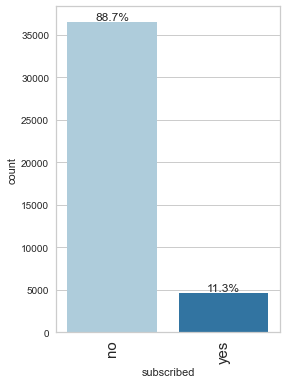

In [10]:
# proportion of subscribed vs not-subscribed 
labeled_barplot(data, "subscribed", perc=True)

* Almost 89% are not subscribed to term deposit 

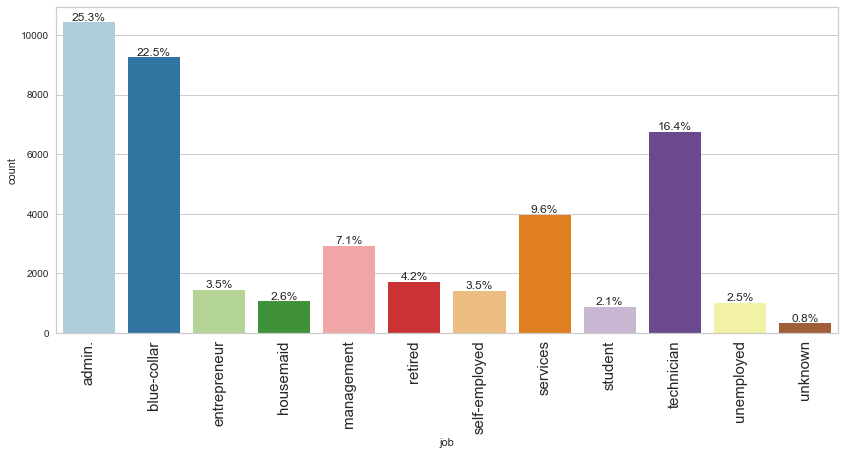

In [11]:
labeled_barplot(data, "job", perc=True)

* 64 % of our clients are admin, blue collars and technician

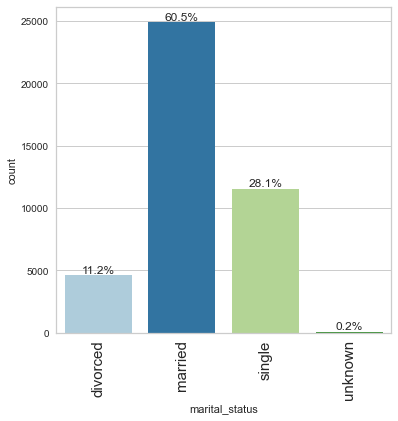

In [12]:
labeled_barplot(data, "marital_status", perc=True)

* Most of our clients are married (60.5%)

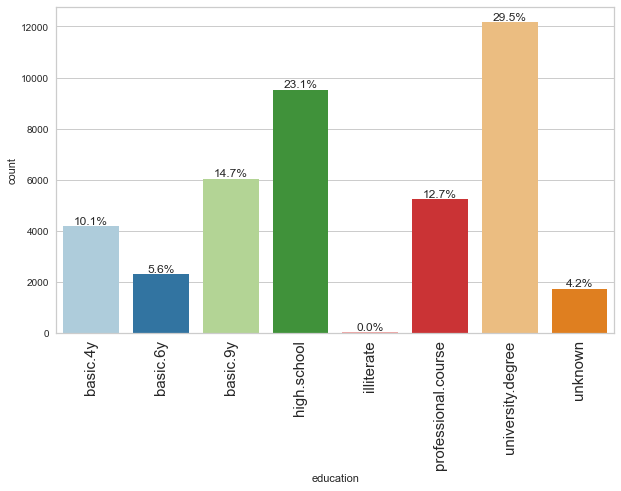

In [13]:
labeled_barplot(data, "education", perc=True)

* More than 50% of our clients have education at high school and below

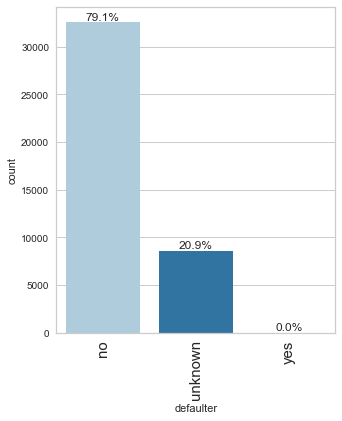

In [14]:
labeled_barplot(data, "defaulter", perc=True)

* Defaulter share is insignificant. At the same time, we do not have a data for 21 % of our clients  

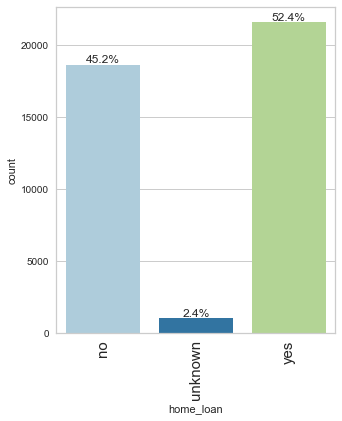

In [15]:
labeled_barplot(data, "home_loan", perc=True)

* More than 50 % of our clients have a home load

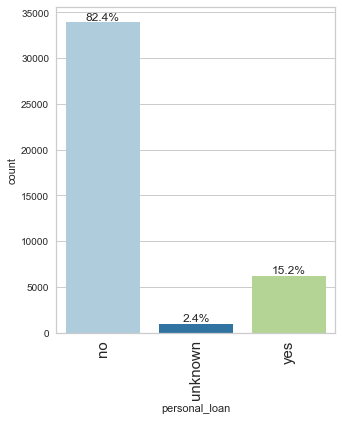

In [16]:
labeled_barplot(data, "personal_loan", perc=True)

* Majority of our clients does not have personal loans 

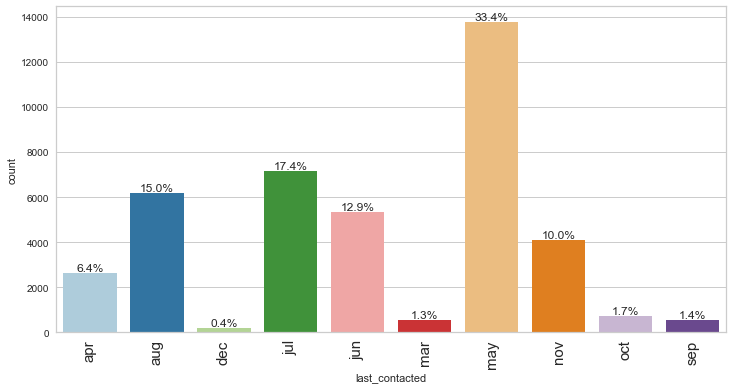

In [17]:
labeled_barplot(data, "last_contacted", perc=True)

* Campagains were mostly conducted during spring and summer

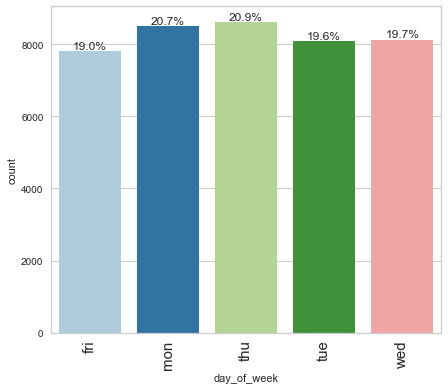

In [18]:
labeled_barplot(data, "day_of_week", perc=True)

* Campaigns were proportionally conducted every working day

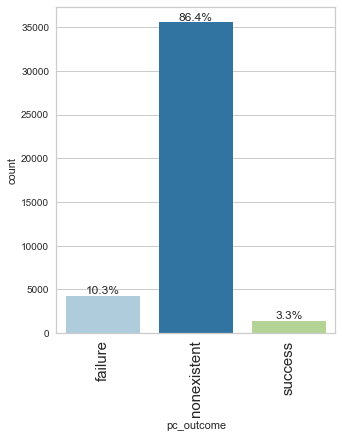

In [19]:
labeled_barplot(data, "pc_outcome", perc=True)

## Bivariate Analysis

In [20]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

subscribed        no   yes    All
job                              
All            36545  4638  41183
admin.          9070  1352  10422
technician      6013   730   6743
blue-collar     8616   638   9254
retired         1286   434   1720
management      2596   328   2924
services        3646   323   3969
student          597   273    870
self-employed   1272   149   1421
unemployed       870   144   1014
entrepreneur    1332   124   1456
housemaid        954   106   1060
unknown          293    37    330
------------------------------------------------------------------------------------------------------------------------


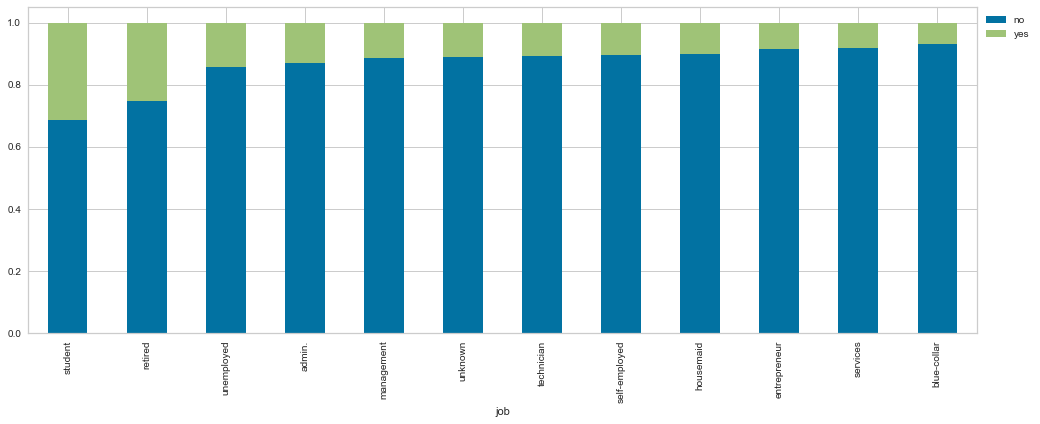

In [21]:
stacked_barplot(data, "job", "subscribed")

* The highest share of unsubscribed clients is among blue collars (one the largest group of our customers) 
* The highest share of subscribed clients is among the students (one of the smallest group of our customers)
* In absolute values, admins, technicians and blu-collars have majority of subscribtions
* In absolute values,housmaids,entrepreneurs and unemployed have the smallest number of subscriptions

subscribed         no   yes    All
marital_status                    
All             36545  4638  41183
married         22396  2532  24928
single           9945  1618  11563
divorced         4136   476   4612
unknown            68    12     80
------------------------------------------------------------------------------------------------------------------------


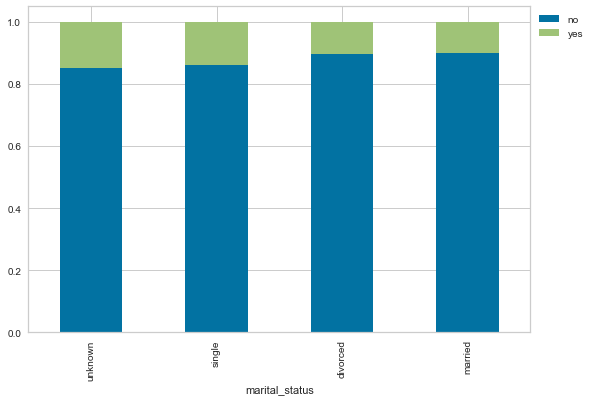

In [22]:
stacked_barplot(data, "marital_status", "subscribed")

* Approximately similar shares of unsubscribed persons exist among martial status groups 


subscribed              no   yes    All
education                              
All                  36545  4638  41183
university.degree    10498  1670  12168
high.school           8484  1031   9515
professional.course   4648   595   5243
basic.9y              5570   472   6042
basic.4y              3748   428   4176
unknown               1479   250   1729
basic.6y              2104   188   2292
illiterate              14     4     18
------------------------------------------------------------------------------------------------------------------------


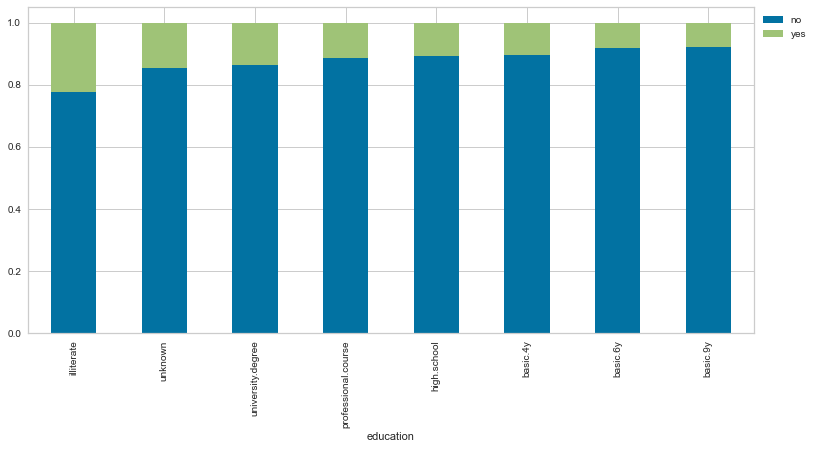

In [23]:
stacked_barplot(data, "education", "subscribed")

* The highest share of subscribed clients is among illiterate group of people 


subscribed     no   yes    All
home_loan                     
All         36545  4638  41183
yes         19066  2507  21573
no          16596  2025  18621
unknown       883   106    989
------------------------------------------------------------------------------------------------------------------------


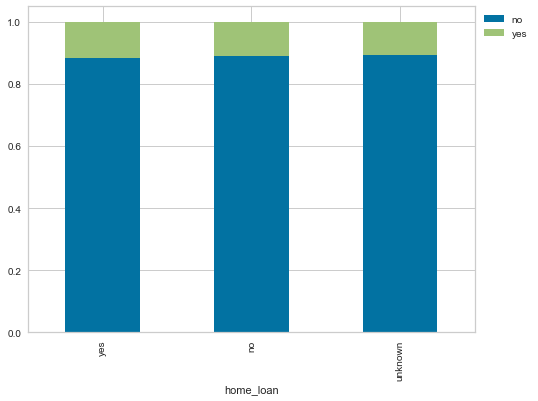

In [24]:
stacked_barplot(data, "home_loan", "subscribed")

* No difference exists for home loan variable 

subscribed        no   yes    All
personal_loan                    
All            36545  4638  41183
no             30097  3850  33947
yes             5565   682   6247
unknown          883   106    989
------------------------------------------------------------------------------------------------------------------------


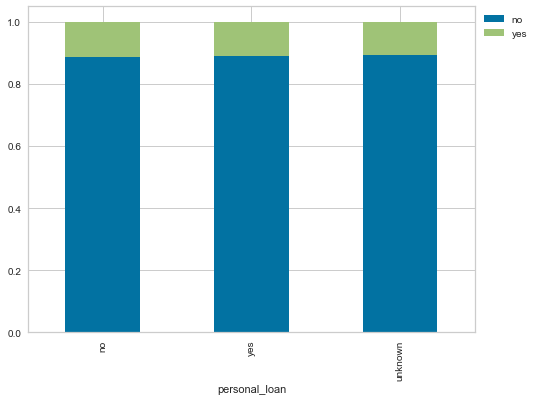

In [25]:
stacked_barplot(data, "personal_loan", "subscribed")

* No difference exists for personal loan variable 

subscribed             no   yes    All
communication_type                    
All                 36545  4638  41183
cellular            22288  3851  26139
telephone           14257   787  15044
------------------------------------------------------------------------------------------------------------------------


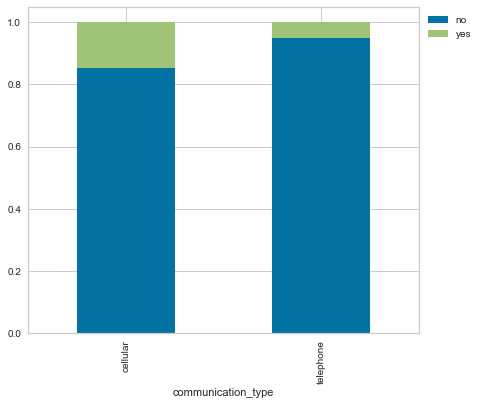

In [26]:
stacked_barplot(data, "communication_type", "subscribed")

* It seems contacting our customers by cellular  demonstrates higher acceptance for subscription to term deposits (in contrast to telephone)

subscribed      no   yes    All
day_of_week                    
All          36545  4638  41183
thu           7578  1045   8623
tue           7137   952   8089
wed           7184   949   8133
mon           7667   847   8514
fri           6979   845   7824
------------------------------------------------------------------------------------------------------------------------


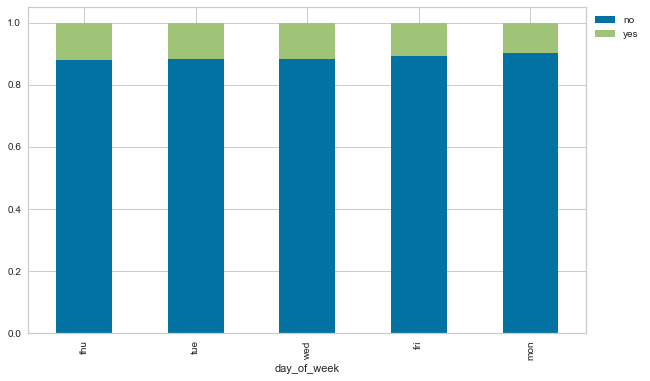

In [27]:
stacked_barplot(data, "day_of_week", "subscribed")

* No difference in subscription exists for day_of_week. (All contacting teams show similar perforamnce)

subscribed          no   yes    All
cc_contact_freq                    
All              36545  4638  41183
1                15342  2299  17641
2                 9358  1210  10568
3                 4765   574   5339
4                 2402   249   2651
5                 1479   120   1599
6                  904    75    979
7                  591    38    629
8                  383    17    400
9                  266    17    283
10                 213    12    225
11                 165    12    177
17                  54     4     58
13                  88     4     92
12                 122     3    125
15                  49     2     51
23                  15     1     16
14                  68     1     69
18                  33     0     33
32                   4     0      4
56                   1     0      1
43                   2     0      2
42                   2     0      2
41                   1     0      1
40                   2     0      2
39                   1     0

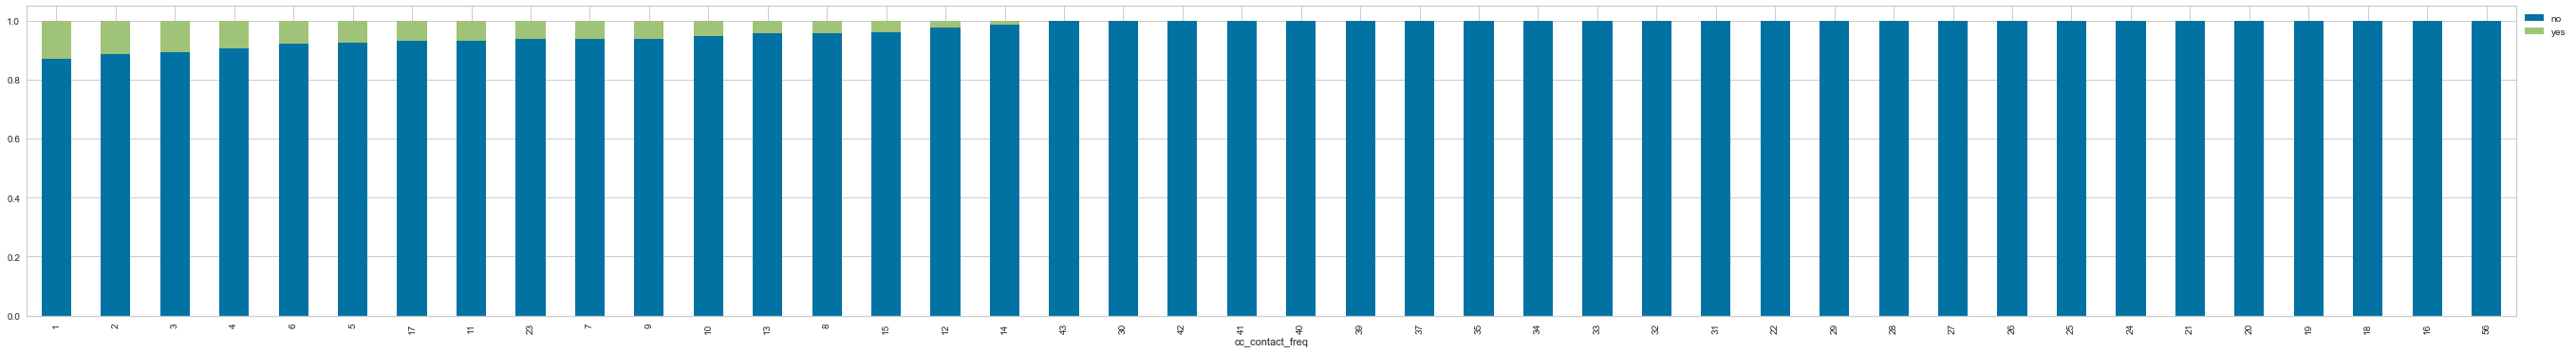

In [28]:
stacked_barplot(data, "cc_contact_freq", "subscribed")

* The share of subscribed customers reduces as a contact frequency increases in current campaign. We should stop calling the already-contacted customers again and again because it is contreproductive 

subscribed          no   yes    All
pc_contact_freq                    
All              36545  4638  41183
0                32422  3141  35563
1                 3594   966   4560
2                  401   349    750
3                   88   128    216
4                   32    38     70
5                    5    13     18
6                    2     3      5
7                    1     0      1
------------------------------------------------------------------------------------------------------------------------


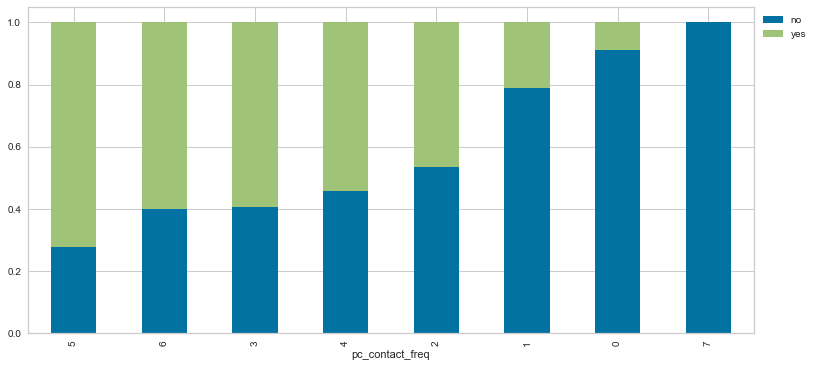

In [29]:
stacked_barplot(data, "pc_contact_freq", "subscribed")

* Previous campaign shows a better performance as number of contacts increases (in contrast to current campgain where it actually decreases). 

subscribed      no   yes    All
pc_outcome                     
All          36545  4638  41183
nonexistent  32422  3141  35563
success        477   893   1370
failure       3646   604   4250
------------------------------------------------------------------------------------------------------------------------


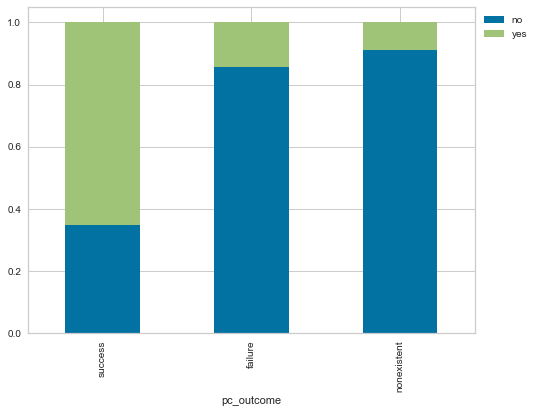

In [30]:
stacked_barplot(data, "pc_outcome", "subscribed")

* Not clear what does succes means if significant part of success contacts did not subscribe to term deposit? The same question should be refered to failure as we have some part of subscribed clients there. Probably the bank should check the criteria of success/failure 

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Preparing data for modeling (Train test split)
- Dropping unnecessary columns
- Any other preprocessing steps (if needed)


**Note: Write the observations from the outliers columns but don't treat them because the data is accurate, but treating them may influence the model's performance.**

### Missing value treatment 

In [31]:
# Checking the missing values 
data.isnull().sum()

age                          0
job                          0
marital_status               0
education                    0
defaulter                    0
home_loan                    0
personal_loan                0
communication_type           0
last_contacted               0
day_of_week                  0
duration                     0
cc_contact_freq              0
days_since_pc                0
pc_contact_freq              0
pc_outcome                   0
consumer_price_index         0
euro_interbank_offer_rate    0
subscribed                   0
dtype: int64

In [32]:
data.isnull().values.any()

False

* There are no missing vaues in this dataset. However, let us check if there are unknown values (in next section).

### Feature engineering (if needed)

In [33]:
# With unknowns
print(data.job.value_counts())
print(data.marital_status.value_counts())
print(data.education.value_counts()) 
print(data.defaulter.value_counts())
print(data.home_loan.value_counts())
print(data.personal_loan.value_counts())
print(data.subscribed.value_counts())


# Without unknowns
# print(data.communication_type.value_counts())
# print(data.last_contacted.value_counts())
# print(data.day_of_week.value_counts())
# print(data.duration.value_counts())
# print(data.cc_contact_freq.value_counts())
# print(data.days_since_pc.value_counts())
# print(data.pc_contact_freq.value_counts())
# print(data.consumer_price_index.value_counts())
# print(data.euro_interbank_offer_rate.value_counts())


admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            870
unknown            330
Name: job, dtype: int64
married     24928
single      11563
divorced     4612
unknown        80
Name: marital_status, dtype: int64
university.degree      12168
high.school             9515
basic.9y                6042
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1729
illiterate                18
Name: education, dtype: int64
no         32583
unknown     8597
yes            3
Name: defaulter, dtype: int64
yes        21573
no         18621
unknown      989
Name: home_loan, dtype: int64
no         33947
yes         6247
unknown      989
Name: personal_loan, dtype: int64
no     36545
yes     4638
Name: subscribed, dtype: int64


* It was decided to keep unknowns in dataset because their dropping may lead to significant information loss

### Preparing data for modeling (Train test split)


In [34]:
# Changing to binary variable (1 or 0)
data["subscribed"] = data["subscribed"].apply(lambda x: 1 if x == "yes" else 0)

In [35]:
X = data.drop(["subscribed"], axis=1)
Y = data["subscribed"]

# adding a contstant² to X variable
X = add_constant(X)

# creating dummies
X = pd.get_dummies(X, drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

## Building a Logistic Regression model

### Model evaluation criterion

### Model can make wrong predictions as:
1. Predicting that a person would subscribe to a term deposit but in reality he/she would not.
2. Predicting that a person would NOT subscribe to a term deposit but in reality he/she will subsrcibe.

### Which case is more important? 
* Both the cases are important as:

* If we predict a person would subscribe to a term deposit but in reality he/she would not then the bank would have an false expectation for next operating period 

* If we predict a person would NOT subscribe to a term deposit but in reality he/she will subsrcibe then this would lead to opportunity loss for the bank.


### How to reduce this loss i.e need to reduce False Negatives?
*  `f1_score` should be maximized, the greater the f1_score higher the chances of identifying both the classes correctly.

In [36]:
# fitting logistic regression model
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit(disp=False,maxiter=500)

print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:             subscribed   No. Observations:                28828
Model:                          Logit   Df Residuals:                    28778
Method:                           MLE   Df Model:                           49
Date:                Fri, 25 Nov 2022   Pseudo R-squ.:                  0.3994
Time:                        03:03:05   Log-Likelihood:                -6074.4
converged:                      False   LL-Null:                       -10114.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                           -25.5339      4.919     -5.191      0.000     -35.175     -15.892
age                               0.0022      0.003      0.775      0.439 

C:\Users\Ireena\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


## Checking Multicollinearity

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

In [37]:
# let's check the VIF of the predictors
vif_series = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
    dtype=float,
)
print("VIF values: \n\n{}\n".format(vif_series.sort_values(ascending=False)))

VIF values: 

home_loan_unknown                         inf
personal_loan_unknown                     inf
const                            1.146631e+05
pc_contact_freq                  5.248629e+00
euro_interbank_offer_rate        4.941403e+00
pc_outcome_nonexistent           4.852596e+00
last_contacted_may               4.847256e+00
consumer_price_index             4.489585e+00
last_contacted_jul               4.402140e+00
last_contacted_aug               4.319863e+00
education_university.degree      4.194200e+00
last_contacted_jun               3.419901e+00
education_high.school            3.415523e+00
last_contacted_nov               3.050879e+00
marital_status_single            2.881445e+00
communication_type_telephone     2.756118e+00
education_professional.course    2.746755e+00
marital_status_married           2.571153e+00
job_blue-collar                  2.415317e+00
pc_outcome_success               2.414918e+00
days_since_pc                    2.318610e+00
education_basic.9y  

In [38]:
# Checking if unknowns in home_loan and personal_load coincide
print(data.home_loan.value_counts())
print(data.personal_loan.value_counts())

print(data.index[data['home_loan']=="unknown"])
print(data.index[data['personal_loan']=="unknown"])

yes        21573
no         18621
unknown      989
Name: home_loan, dtype: int64
no         33947
yes         6247
unknown      989
Name: personal_loan, dtype: int64
Int64Index([   29,    81,   261,   385,   401,   470,   485,   494,   495,
              501,
            ...
            40787, 40827, 40870, 40890, 40936, 40985, 41009, 41010, 41024,
            41110],
           dtype='int64', length=989)
Int64Index([   29,    81,   261,   385,   401,   470,   485,   494,   495,
              501,
            ...
            40787, 40827, 40870, 40890, 40936, 40985, 41009, 41010, 41024,
            41110],
           dtype='int64', length=989)


* Indeed unknowns for home_loan and personal_loan coincide. So we drop personal_loan_unknown 

In [39]:
X_train1 = X_train.drop("personal_loan_unknown", axis=1)
vif_series2 = pd.Series(
    [variance_inflation_factor(X_train1.values, i) for i in range(X_train1.shape[1])],
    index=X_train1.columns,
)
print("Series before feature selection: \n\n{}\n".format(vif_series2.sort_values(ascending=False)))

Series before feature selection: 

const                            114663.118171
pc_contact_freq                       5.248629
euro_interbank_offer_rate             4.941403
pc_outcome_nonexistent                4.852596
last_contacted_may                    4.847256
consumer_price_index                  4.489585
last_contacted_jul                    4.402140
last_contacted_aug                    4.319863
education_university.degree           4.194200
last_contacted_jun                    3.419901
education_high.school                 3.415523
last_contacted_nov                    3.050879
marital_status_single                 2.881445
communication_type_telephone          2.756118
education_professional.course         2.746755
marital_status_married                2.571153
job_blue-collar                       2.415317
pc_outcome_success                    2.414918
days_since_pc                         2.318610
education_basic.9y                    2.252310
job_technician           

* There are no large VIF (>10). THerefore, we assume that multicoliniarity is confirmed

In [40]:
# fitting logistic regression model
logit = sm.Logit(y_train, X_train1.astype(float))
lg = logit.fit(disp=False,maxiter=500)

print(lg.summary())


                           Logit Regression Results                           
Dep. Variable:             subscribed   No. Observations:                28828
Model:                          Logit   Df Residuals:                    28778
Method:                           MLE   Df Model:                           49
Date:                Fri, 25 Nov 2022   Pseudo R-squ.:                  0.3994
Time:                        03:03:14   Log-Likelihood:                -6074.4
converged:                      False   LL-Null:                       -10114.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                           -25.5339      4.919     -5.191      0.000     -35.175     -15.892
age                               0.0022      0.003      0.775      0.439 

C:\Users\Ireena\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [41]:
# running a loop to drop variables with high p-value

# initial list of columns
cols = X_train1.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    X_train_aux = X_train1[cols]

    # fitting the model
    model = sm.Logit(y_train, X_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

C:\Users\Ireena\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


['const', 'duration', 'cc_contact_freq', 'consumer_price_index', 'euro_interbank_offer_rate', 'job_blue-collar', 'job_retired', 'job_student', 'education_basic.9y', 'education_high.school', 'defaulter_unknown', 'last_contacted_aug', 'last_contacted_dec', 'last_contacted_jul', 'last_contacted_jun', 'last_contacted_mar', 'last_contacted_may', 'last_contacted_nov', 'last_contacted_oct', 'last_contacted_sep', 'day_of_week_tue', 'day_of_week_wed', 'pc_outcome_nonexistent', 'pc_outcome_success']


In [42]:
X_train2 = X_train1[selected_features]

In [43]:
logit2 = sm.Logit(y_train, X_train2.astype(float))
lg2 = logit2.fit(disp=False)

print(lg2.summary())

                           Logit Regression Results                           
Dep. Variable:             subscribed   No. Observations:                28828
Model:                          Logit   Df Residuals:                    28804
Method:                           MLE   Df Model:                           23
Date:                Fri, 25 Nov 2022   Pseudo R-squ.:                  0.3983
Time:                        03:03:17   Log-Likelihood:                -6085.4
converged:                       True   LL-Null:                       -10114.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                       -25.3222      4.556     -5.558      0.000     -34.252     -16.392
duration                      0.0047    8.8e-05     53.133      0.000       0.005     

In [44]:
# let's check the VIF of the predictors
vif_series = pd.Series(
    [variance_inflation_factor(X_train2.values, i) for i in range(X_train2.shape[1])],
    index=X_train2.columns,
    dtype=float,
)
print("VIF values: \n\n{}\n".format(vif_series.sort_values(ascending=False)))

VIF values: 

const                        97929.385140
last_contacted_may               4.683599
euro_interbank_offer_rate        4.281895
last_contacted_jul               3.986165
last_contacted_aug               3.952924
consumer_price_index             3.808086
last_contacted_jun               3.360421
last_contacted_nov               2.938532
pc_outcome_nonexistent           1.586922
pc_outcome_success               1.393714
last_contacted_oct               1.283969
last_contacted_sep               1.258922
job_blue-collar                  1.251948
education_basic.9y               1.205948
last_contacted_mar               1.200136
defaulter_unknown                1.090243
education_high.school            1.090100
last_contacted_dec               1.080099
day_of_week_tue                  1.074772
day_of_week_wed                  1.073482
job_retired                      1.051208
job_student                      1.041973
cc_contact_freq                  1.040383
duration            

## Coefficient interpretations

Note that we encoded the subscribed as 1 and not subscribed as 0. Therefore, positive coefficients (duration,consumer_price_index, job_retired,job_student etc) contribute to subscription  and negative coefficients would decrease the chances that the person would subsribe. 

###  Converting coefficients to odds
* The coefficients of the logistic regression model are in terms of log(odd), to find the odds we have to take the exponential of the coefficients. 
* Therefore, **odds =  exp(b)**
* The percentage change in odds is given as **odds = (exp(b) - 1) * 100**

In [45]:
# converting coefficients to odds
odds = np.exp(lg2.params)

# finding the percentage change
perc_change_odds = (np.exp(lg2.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train2.columns).T

,const,duration,cc_contact_freq,consumer_price_index,euro_interbank_offer_rate,job_blue-collar,job_retired,job_student,education_basic.9y,education_high.school,defaulter_unknown,last_contacted_aug,last_contacted_dec,last_contacted_jul,last_contacted_jun,last_contacted_mar,last_contacted_may,last_contacted_nov,last_contacted_oct,last_contacted_sep,day_of_week_tue,day_of_week_wed,pc_outcome_nonexistent,pc_outcome_success
Odds,1.006226e-11,1.004686,0.948550,1.280944,0.493723,0.768665,1.405415,1.314279,0.827648,0.863327,0.732831,2.152817,2.408925,1.896430,1.860206,4.352276,0.545566,1.476672,2.504054,1.730845,1.135908,1.148644,1.521507,6.971976
Change_odd%,-1.000000e+02,0.468576,-5.144965,28.094376,-50.627659,-23.133521,40.541481,31.427897,-17.235166,-13.667265,-26.716877,115.281715,140.892536,89.643002,86.020585,335.227597,-45.443371,47.667197,150.405395,73.084491,13.590756,14.864417,52.150699,597.197625


## Model performance evaluation

In [46]:
# defining a function to plot the confusion_matrix of a classification model

def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [47]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

#### Checking model performance on the training set

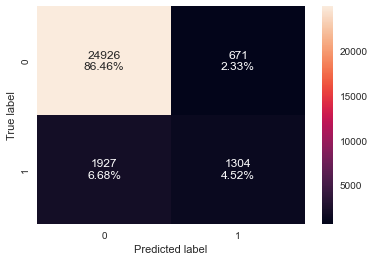

In [48]:
# creating confusion matrix
confusion_matrix_statsmodels(lg2, X_train2, y_train)

In [49]:
log_reg_model_train_perf=model_performance_classification_statsmodels(lg2, X_train2, y_train)
print("Training performance:")
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.909879,0.40359,0.660253,0.50096


#### ROC-AUC

* ROC-AUC on training set

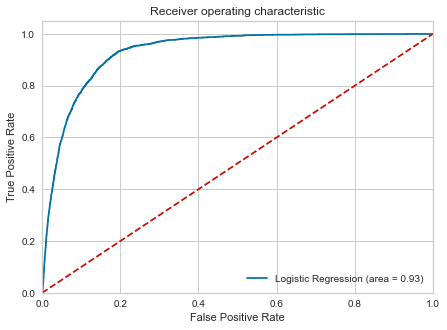

In [50]:
logit_roc_auc_train = roc_auc_score(y_train, lg2.predict(X_train2))
fpr, tpr, thresholds = roc_curve(y_train, lg2.predict(X_train2))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

* Logistic Regression model is giving a good performance on training set.

### Model Performance Improvement

* Let's see if the f1 score can be improved further, by changing the model threshold using AUC-ROC Curve.

In [51]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg2.predict(X_train2))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.08132432318090808


#### Checking model performance on training set

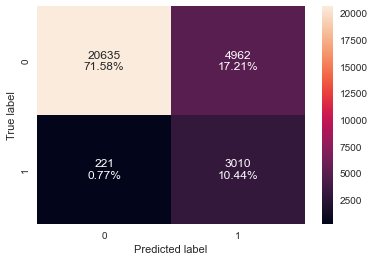

In [52]:
# creating confusion matrix
confusion_matrix_statsmodels(
    lg2, X_train2, y_train, threshold=optimal_threshold_auc_roc
)

In [53]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg2, X_train2, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.82021,0.9316,0.377572,0.537356


* Recall and F1 of model has increased but the other metrics have reduced.
* The model is still giving a good performance.

#### Let's use Precision-Recall curve and see if we can find a better threshold

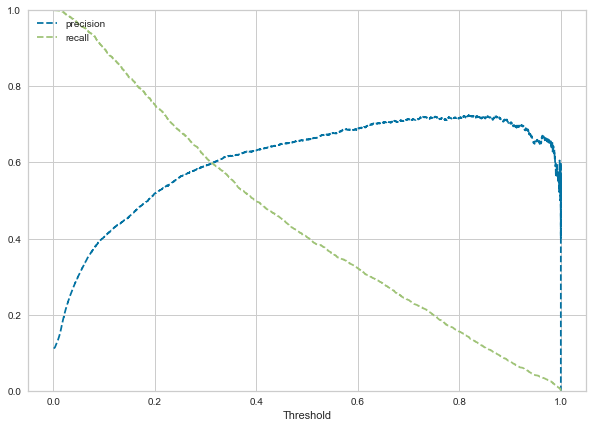

In [54]:
y_scores = lg2.predict(X_train2)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

In [55]:
print(prec)

[0.11207853 0.11208242 0.11208631 ... 0.5        0.         1.        ]


In [56]:
# setting the threshold
optimal_threshold_curve = 0.33

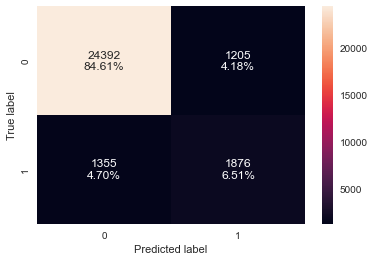

In [57]:
# creating confusion matrix
confusion_matrix_statsmodels(lg2, X_train2, y_train, threshold=optimal_threshold_curve)

In [58]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg2, X_train2, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


,Accuracy,Recall,Precision,F1
0,0.911197,0.580625,0.608893,0.594423


## Final Model Summary

In [59]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.08 Threshold",
    "Logistic Regression-0.33 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression-default Threshold (0.5),Logistic Regression-0.08 Threshold,Logistic Regression-0.33 Threshold
Accuracy,0.909879,0.820210,0.911197
Recall,0.403590,0.931600,0.580625
Precision,0.660253,0.377572,0.608893
F1,0.500960,0.537356,0.594423


### Let's check the performance on the test set

**Dropping the columns from the test set that were dropped from the training set**

In [60]:
X_test2 = X_test[list(X_train2.columns)]

**Using model with default threshold**

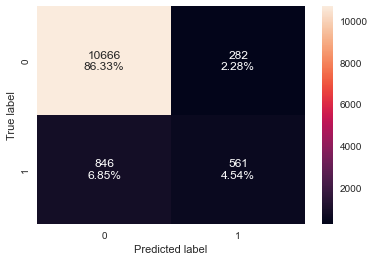

In [61]:
# creating confusion matrix
confusion_matrix_statsmodels(lg2, X_test2, y_test)

In [62]:
log_reg_model_test_perf = model_performance_classification_statsmodels(
    lg2, X_test2, y_test
)

print("Test performance:")
log_reg_model_test_perf

Test performance:


,Accuracy,Recall,Precision,F1
0,0.908701,0.398721,0.66548,0.498667


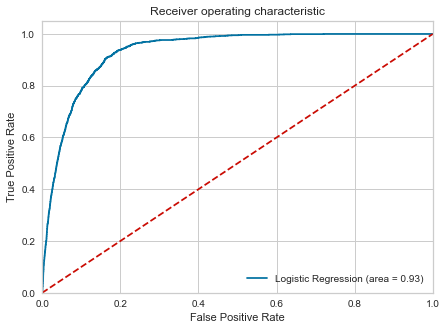

In [63]:
logit_roc_auc_train = roc_auc_score(y_test, lg2.predict(X_test2))
fpr, tpr, thresholds = roc_curve(y_test, lg2.predict(X_test2))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

**Using model with threshold=0.08** 

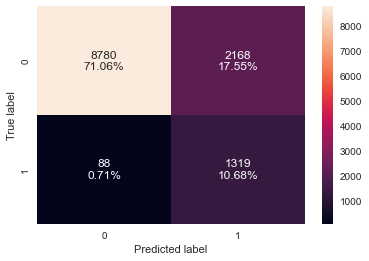

In [64]:
# creating confusion matrix
confusion_matrix_statsmodels(lg2, X_test2, y_test, threshold=optimal_threshold_auc_roc)

In [65]:
# checking model performance 
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg2, X_test2, y_test, threshold=optimal_threshold_auc_roc
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


,Accuracy,Recall,Precision,F1
0,0.817402,0.937456,0.378262,0.539027


**Using model with threshold = 0.33**

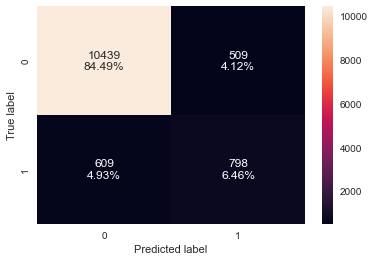

In [66]:
# creating confusion matrix
confusion_matrix_statsmodels(lg2, X_test2, y_test, threshold=optimal_threshold_curve)

In [67]:
# checking model performance 
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    lg2, X_test2, y_test, threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


,Accuracy,Recall,Precision,F1
0,0.90951,0.567164,0.610559,0.588062


### Model performance summary

In [68]:
# training performance comparison

models_train_comp_df_LR = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df_LR.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.08 Threshold",
    "Logistic Regression-0.33 Threshold",
]

print("Training performance comparison:")
models_train_comp_df_LR

Training performance comparison:


,Logistic Regression-default Threshold (0.5),Logistic Regression-0.08 Threshold,Logistic Regression-0.33 Threshold
Accuracy,0.909879,0.820210,0.911197
Recall,0.403590,0.931600,0.580625
Precision,0.660253,0.377572,0.608893
F1,0.500960,0.537356,0.594423


In [69]:
# testing performance comparison

models_test_comp_df_LR = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df_LR.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.08 Threshold",
    "Logistic Regression-0.33 Threshold",
]

print("Test set performance comparison:")
models_test_comp_df_LR

Test set performance comparison:


,Logistic Regression-default Threshold (0.5),Logistic Regression-0.08 Threshold,Logistic Regression-0.33 Threshold
Accuracy,0.908701,0.817402,0.909510
Recall,0.398721,0.937456,0.567164
Precision,0.665480,0.378262,0.610559
F1,0.498667,0.539027,0.588062


## Building a Decision Tree model

Lets convert the columns with an 'object' datatype into categorical variables

In [70]:
# load data Bank_Telemarketing.csv
data_DT = pd.read_csv("Bank_Telemarketing.csv")

# Dropping the customer_id,email_id,first_name and last_name 
data_DT.drop(["customer_id"], axis=1, inplace=True)
data_DT.drop(["email_id"], axis=1, inplace=True)
data_DT.drop(["first_name"], axis=1, inplace=True)
data_DT.drop(["last_name"], axis=1, inplace=True)


for feature in data_DT.columns: # Loop through all columns in the dataframe
    if data_DT[feature].dtype == 'object': # Only apply for columns with categorical strings
        data_DT[feature] = pd.Categorical(data_DT[feature])# Replace strings with an integer
data_DT

,age,job,marital_status,education,defaulter,home_loan,personal_loan,communication_type,last_contacted,day_of_week,duration,cc_contact_freq,days_since_pc,pc_contact_freq,pc_outcome,consumer_price_index,euro_interbank_offer_rate,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,0,0,nonexistent,93.994,4.857,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,0,0,nonexistent,93.994,4.857,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,0,0,nonexistent,93.994,4.857,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,0,0,nonexistent,93.994,4.857,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,0,0,nonexistent,93.994,4.857,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41178,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,0,0,nonexistent,94.767,1.028,yes
41179,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,0,0,nonexistent,94.767,1.028,no
41180,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,0,0,nonexistent,94.767,1.028,no
41181,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,0,0,nonexistent,94.767,1.028,yes


In [71]:
 data_DT.info()  # many columns are of type object i.e. strings. These need to be converted to ordinal type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41183 entries, 0 to 41182
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   age                        41183 non-null  int64   
 1   job                        41183 non-null  category
 2   marital_status             41183 non-null  category
 3   education                  41183 non-null  category
 4   defaulter                  41183 non-null  category
 5   home_loan                  41183 non-null  category
 6   personal_loan              41183 non-null  category
 7   communication_type         41183 non-null  category
 8   last_contacted             41183 non-null  category
 9   day_of_week                41183 non-null  category
 10  duration                   41183 non-null  int64   
 11  cc_contact_freq            41183 non-null  int64   
 12  days_since_pc              41183 non-null  int64   
 13  pc_contact_freq            4118

In [72]:
# Converting into numeric data
replaceStruct = {
                "education":     {"illiterate": 1, "basic.4y": 2 ,"basic.4y": 3,"basic.6y":4 ,"basic.9y":5,"high.school":6,"professional.course":7,"university.degree":8,"unknown":-1},
                "defaulter":     {"no": 0, "yes": 1,"unknown": -1 },
                "home_loan":     {"no": 0, "yes": 1,"unknown": -1 },
                "personal_loan":     {"no": 0, "yes": 1,"unknown": -1 }, 
                "subscribed":      {"yes": 1, "no": 0}
                    }
oneHotCols=["job","marital_status","communication_type","last_contacted","day_of_week","pc_outcome"]

In [73]:
# Replaing the variables and add dummy variables 
data_DT=data_DT.replace(replaceStruct)
data_DT=pd.get_dummies(data_DT, columns=oneHotCols)
data_DT


,age,education,defaulter,home_loan,personal_loan,duration,cc_contact_freq,days_since_pc,pc_contact_freq,consumer_price_index,euro_interbank_offer_rate,subscribed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_status_divorced,marital_status_married,marital_status_single,marital_status_unknown,communication_type_cellular,communication_type_telephone,last_contacted_apr,last_contacted_aug,last_contacted_dec,last_contacted_jul,last_contacted_jun,last_contacted_mar,last_contacted_may,last_contacted_nov,last_contacted_oct,last_contacted_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,pc_outcome_failure,pc_outcome_nonexistent,pc_outcome_success
0,56,3,0,0,0,261,1,0,0,93.994,4.857,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
1,57,6,-1,0,0,149,1,0,0,93.994,4.857,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
2,37,6,0,1,0,226,1,0,0,93.994,4.857,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,40,4,0,0,0,151,1,0,0,93.994,4.857,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,56,6,0,0,1,307,1,0,0,93.994,4.857,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41178,73,7,0,1,0,334,1,0,0,94.767,1.028,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
41179,46,7,0,0,0,383,1,0,0,94.767,1.028,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
41180,56,8,0,1,0,189,2,0,0,94.767,1.028,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
41181,44,7,0,0,0,442,1,0,0,94.767,1.028,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0


In [74]:
data_DT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41183 entries, 0 to 41182
Data columns (total 48 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           41183 non-null  int64  
 1   education                     41183 non-null  int64  
 2   defaulter                     41183 non-null  int64  
 3   home_loan                     41183 non-null  int64  
 4   personal_loan                 41183 non-null  int64  
 5   duration                      41183 non-null  int64  
 6   cc_contact_freq               41183 non-null  int64  
 7   days_since_pc                 41183 non-null  int64  
 8   pc_contact_freq               41183 non-null  int64  
 9   consumer_price_index          41183 non-null  float64
 10  euro_interbank_offer_rate     41183 non-null  float64
 11  subscribed                    41183 non-null  int64  
 12  job_admin.                    41183 non-null  uint8  
 13  j

## Split Data

In [75]:
X = data_DT.drop("subscribed", axis=1)
y = data_DT.pop("subscribed")

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

In [77]:
model = DecisionTreeClassifier(criterion="gini", random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [78]:
print("Accuracy on training set : ",model.score(X_train, y_train))
print("Accuracy on test set : ",model.score(X_test, y_test))

Accuracy on training set :  1.0
Accuracy on test set :  0.8909753136382031


#### Checking model performance on training set

In [79]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [80]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [81]:
decision_tree_perf_train=model_performance_classification_sklearn(model,X_train,y_train)

* Model is overfitted

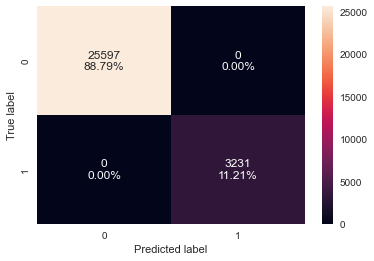

In [82]:
confusion_matrix_sklearn(model, X_train, y_train)

#### Checking model performance on test set

In [83]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model, X_test, y_test
)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.890975,0.54371,0.520408,0.531804


* As expected for overfitting model, it shows much worse results on test data

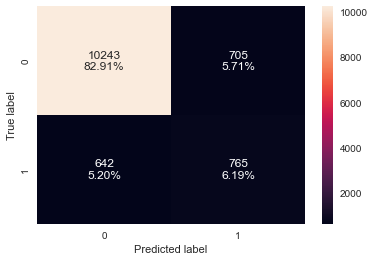

In [84]:
confusion_matrix_sklearn(model, X_test, y_test)

In [85]:
column_names = list(X.columns)
feature_names = column_names
print(feature_names)

['age', 'education', 'defaulter', 'home_loan', 'personal_loan', 'duration', 'cc_contact_freq', 'days_since_pc', 'pc_contact_freq', 'consumer_price_index', 'euro_interbank_offer_rate', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'marital_status_divorced', 'marital_status_married', 'marital_status_single', 'marital_status_unknown', 'communication_type_cellular', 'communication_type_telephone', 'last_contacted_apr', 'last_contacted_aug', 'last_contacted_dec', 'last_contacted_jul', 'last_contacted_jun', 'last_contacted_mar', 'last_contacted_may', 'last_contacted_nov', 'last_contacted_oct', 'last_contacted_sep', 'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed', 'pc_outcome_failure', 'pc_outcome_nonexistent', 'pc_outcome_success']


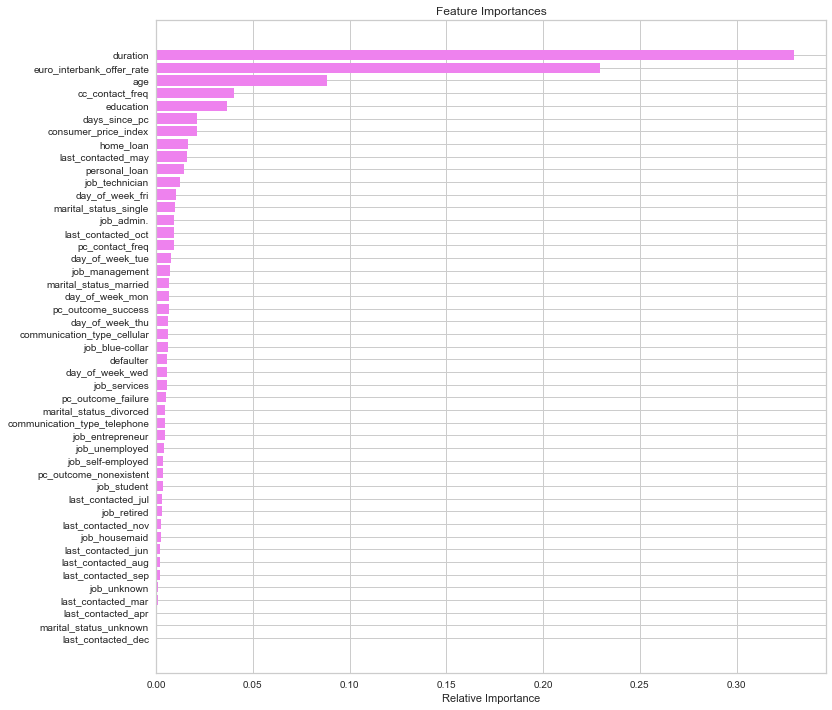

In [86]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Do we need to prune the tree?

Yes, we need prunning the tree because it is overfitted (only 1 are present in trained dataset)

### Using GridSearch for Hyperparameter tuning of our tree model 
* Let's see if we can improve our model performance even more (using a pre prunning).

In [87]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from

parameters = {
    "max_depth": [np.arange(2, 50, 5), None],
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    "min_impurity_decrease": [0.000001, 0.00001, 0.0001],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(min_impurity_decrease=0.0001, random_state=1)

#### Checking performance on training set

In [88]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, X_train, y_train
)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.925628,0.620551,0.685939,0.651609


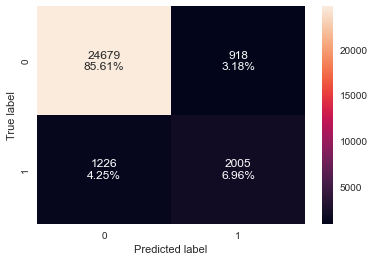

In [89]:
confusion_matrix_sklearn(estimator, X_train, y_train)

#### Checking model performance on test set

In [90]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, X_test, y_test
)

decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.915824,0.575693,0.646449,0.609023


* Model performs comparably at both train and test data

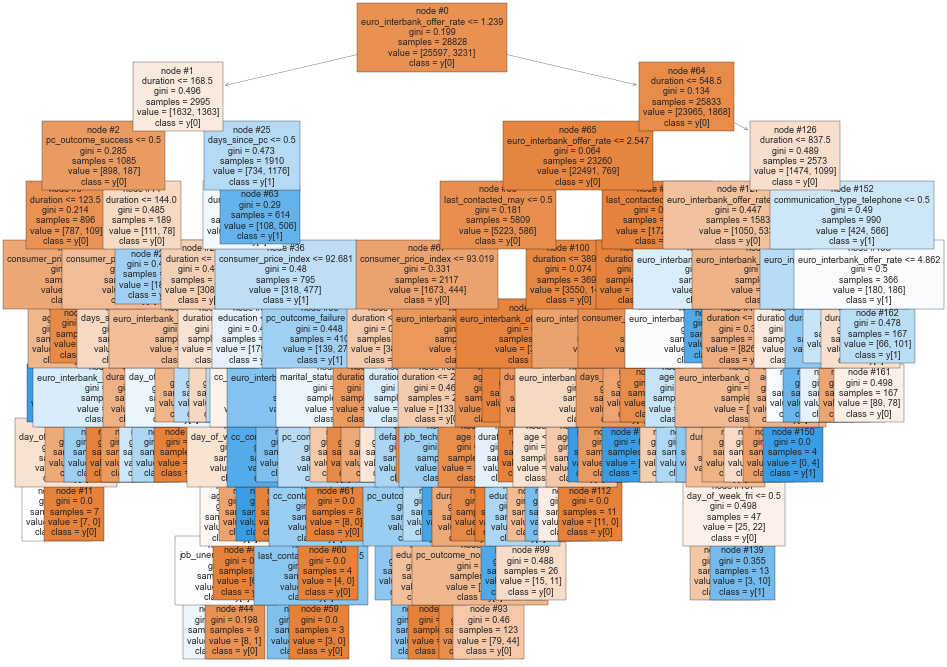

In [91]:
plt.figure(figsize=(15, 12))

tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
plt.show()

## Cost Complexity Pruning

In [92]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [93]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000,0.000000
1,0.000014,0.000069
2,0.000017,0.000138
3,0.000017,0.000207
4,0.000017,0.000277
...,...,...
885,0.002604,0.134630
886,0.002726,0.137357
887,0.009436,0.146793
888,0.024959,0.171752


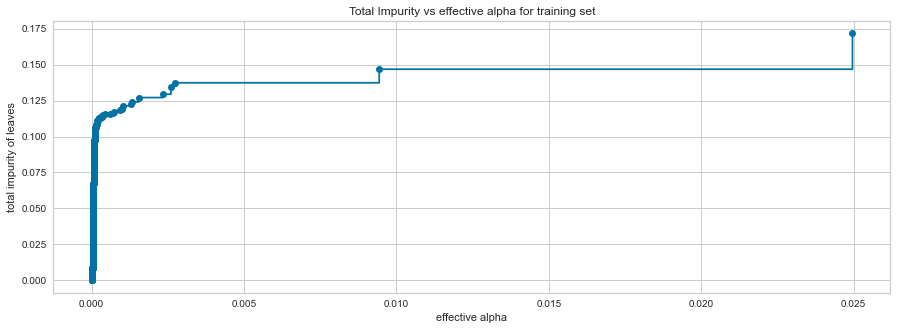

In [94]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [95]:
# Next, we train a decision tree using the effective alphas. 
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.027281852697797232


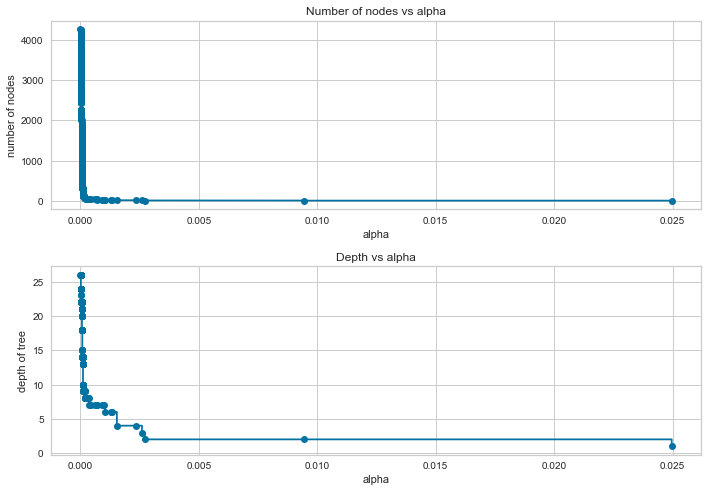

In [96]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [97]:
f1_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = f1_score(y_train, pred_train)
    f1_train.append(values_train)

In [98]:
f1_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = f1_score(y_test, pred_test)
    f1_test.append(values_test)

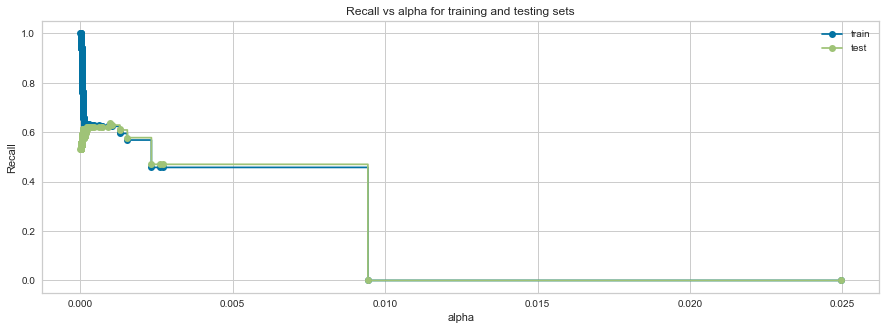

In [99]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, f1_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, f1_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [100]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(f1_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.000983477494594289, random_state=1)


## Model Performance Comparison and Conclusions

#### Checking model performance on training set

In [101]:
decision_tree_postpruned_perf_train = model_performance_classification_sklearn(
    best_model, X_train, y_train
)
decision_tree_postpruned_perf_train

,Accuracy,Recall,Precision,F1
0,0.912203,0.679666,0.5948,0.634407


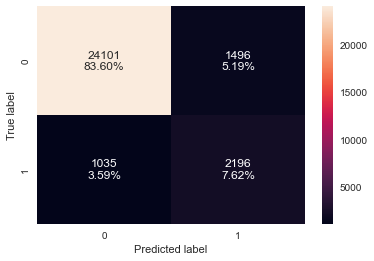

In [102]:
confusion_matrix_sklearn(best_model, X_train, y_train)

In [103]:
decision_tree_postpruned_perf_test = model_performance_classification_sklearn(
    best_model, X_test, y_test
)
decision_tree_postpruned_perf_test

,Accuracy,Recall,Precision,F1
0,0.911858,0.677328,0.600126,0.636394


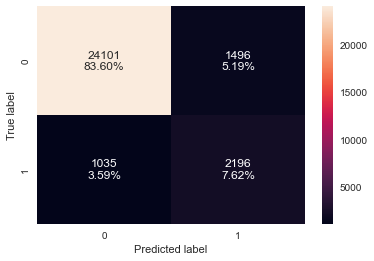

In [104]:
confusion_matrix_sklearn(best_model, X_train, y_train)

* Model shows good and similar resuts at both train and test data 

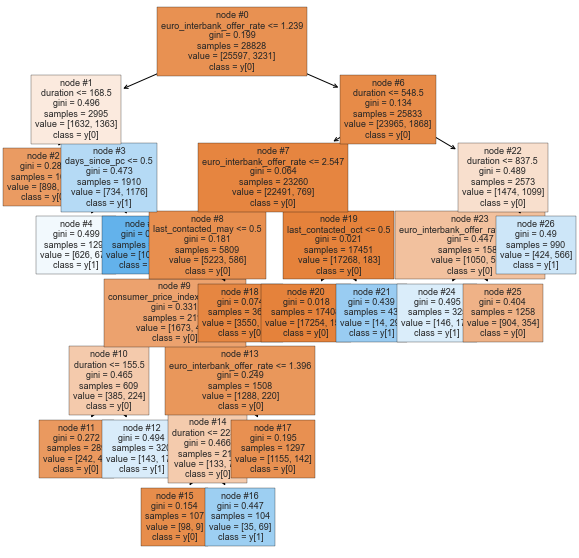

In [105]:
plt.figure(figsize=(10, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()
plt.show()

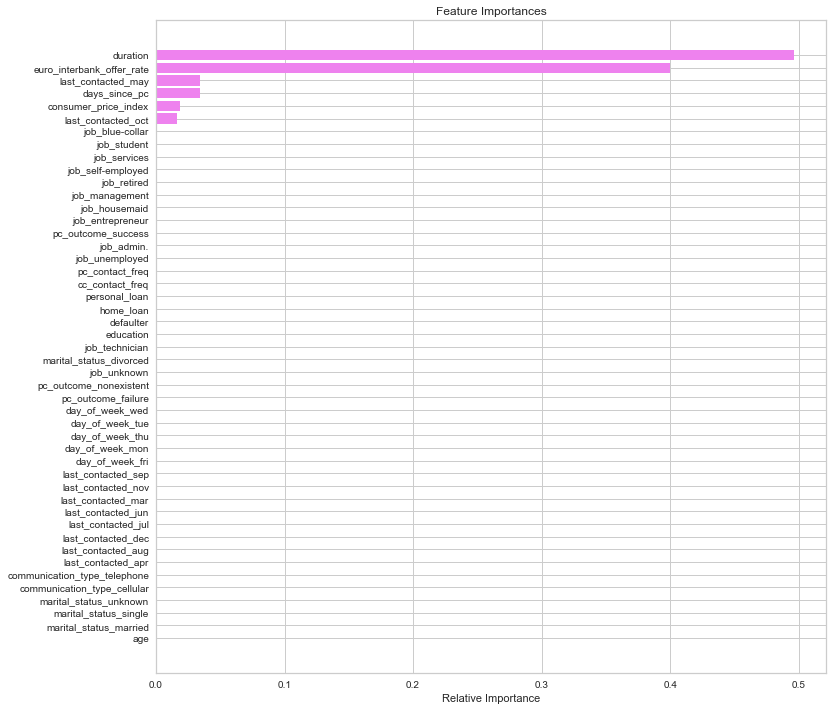

In [106]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [107]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_postpruned_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df


Training performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,1.0,0.925628,0.912203
Recall,1.0,0.620551,0.679666
Precision,1.0,0.685939,0.594800
F1,1.0,0.651609,0.634407


In [108]:
# Comparing the results with logistic regression 
models_train_comp_df_LR

,Logistic Regression-default Threshold (0.5),Logistic Regression-0.08 Threshold,Logistic Regression-0.33 Threshold
Accuracy,0.909879,0.820210,0.911197
Recall,0.403590,0.931600,0.580625
Precision,0.660253,0.377572,0.608893
F1,0.500960,0.537356,0.594423


* DT (being non-linear model) shows a better performance on F1 score than logistic regression

In [109]:
# test performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_postpruned_perf_test.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_train_comp_df


Test set performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.890975,0.915824,0.911858
Recall,0.543710,0.575693,0.677328
Precision,0.520408,0.646449,0.600126
F1,0.531804,0.609023,0.636394


In [110]:
models_test_comp_df_LR

,Logistic Regression-default Threshold (0.5),Logistic Regression-0.08 Threshold,Logistic Regression-0.33 Threshold
Accuracy,0.908701,0.817402,0.909510
Recall,0.398721,0.937456,0.567164
Precision,0.665480,0.378262,0.610559
F1,0.498667,0.539027,0.588062


* DT (being non-linear model) shows a better performance than logistic regression

## K-means Clustering

In [111]:
# load data Bank_Telemarketing.csv
data_K_means = pd.read_csv("Bank_Telemarketing.csv")

# Dropping the customer_id,email_id,first_name and last_name 
data_K_means.drop(["customer_id"], axis=1, inplace=True)
data_K_means.drop(["email_id"], axis=1, inplace=True)
data_K_means.drop(["first_name"], axis=1, inplace=True)
data_K_means.drop(["last_name"], axis=1, inplace=True)


for feature in data_K_means.columns: # Loop through all columns in the dataframe
    if data_K_means[feature].dtype == 'object': # Only apply for columns with categorical strings
        data_K_means[feature] = pd.Categorical(data_K_means[feature])# Replace strings with an integer

data_K_means.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41183 entries, 0 to 41182
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   age                        41183 non-null  int64   
 1   job                        41183 non-null  category
 2   marital_status             41183 non-null  category
 3   education                  41183 non-null  category
 4   defaulter                  41183 non-null  category
 5   home_loan                  41183 non-null  category
 6   personal_loan              41183 non-null  category
 7   communication_type         41183 non-null  category
 8   last_contacted             41183 non-null  category
 9   day_of_week                41183 non-null  category
 10  duration                   41183 non-null  int64   
 11  cc_contact_freq            41183 non-null  int64   
 12  days_since_pc              41183 non-null  int64   
 13  pc_contact_freq            4118

In [112]:
# selecting numerical columns which will be used for clustering
num_col = data_K_means.select_dtypes(include=np.number).columns.tolist()
num_col # variables used for clustering


['age',
 'duration',
 'cc_contact_freq',
 'days_since_pc',
 'pc_contact_freq',
 'consumer_price_index',
 'euro_interbank_offer_rate']

In [113]:
# scaling the dataset before clustering
scaler = StandardScaler()
subset = data_K_means[num_col].copy()
subset_scaled = scaler.fit_transform(subset)

In [114]:
# creating a dataframe of the scaled columns
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

Number of Clusters: 1 	Average Distortion: 2.268514962371312
Number of Clusters: 2 	Average Distortion: 1.879195449945654
Number of Clusters: 3 	Average Distortion: 1.7727379937360161
Number of Clusters: 4 	Average Distortion: 1.6802226968525626
Number of Clusters: 5 	Average Distortion: 1.5974365427953159
Number of Clusters: 6 	Average Distortion: 1.494995072814501
Number of Clusters: 7 	Average Distortion: 1.367547586951907
Number of Clusters: 8 	Average Distortion: 1.318641329419584


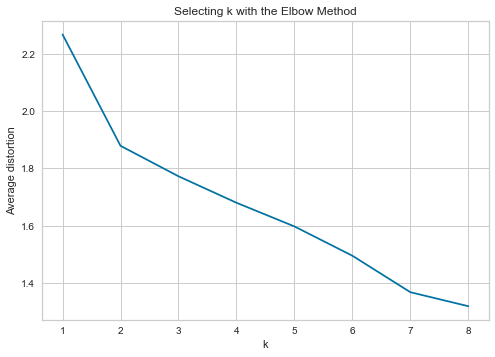

In [115]:
clusters = range(1, 9)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(subset_scaled_df)
    prediction = model.predict(subset_scaled_df)
    distortion = (
        sum(
            np.min(cdist(subset_scaled_df, model.cluster_centers_, "euclidean"), axis=1)
        )
        / subset_scaled_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average distortion")
plt.title("Selecting k with the Elbow Method")
plt.show()

**Appropriate value for k seems to be 5.**

**Let's check the silhouette scores.**

For n_clusters = 2, the silhouette score is 0.3467784490005537)
For n_clusters = 3, the silhouette score is 0.34645896955249433)
For n_clusters = 4, the silhouette score is 0.3562681328950231)
For n_clusters = 5, the silhouette score is 0.3572113680993711)
For n_clusters = 6, the silhouette score is 0.2638689239090698)
For n_clusters = 7, the silhouette score is 0.2818497780737849)
For n_clusters = 8, the silhouette score is 0.279752299406968)
For n_clusters = 9, the silhouette score is 0.2832442018301226)


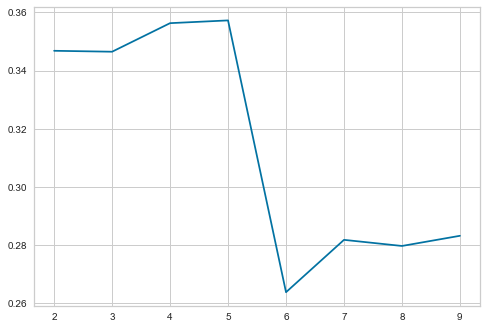

In [116]:
sil_score = []
cluster_list = list(range(2, 10))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((subset_scaled_df))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(subset_scaled_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list, sil_score)
plt.show()

In [117]:
# let's take 4 as number of clusters
kmeans = KMeans(n_clusters=6, random_state=0)
kmeans.fit(subset_scaled_df)

KMeans(n_clusters=6, random_state=0)

In [118]:
# adding kmeans cluster labels to the original and scaled dataframes

data_K_means["K_means_segments"] = kmeans.labels_
subset_scaled_df["K_means_segments"] = kmeans.labels_

data_K_means

,age,job,marital_status,education,defaulter,home_loan,personal_loan,communication_type,last_contacted,day_of_week,duration,cc_contact_freq,days_since_pc,pc_contact_freq,pc_outcome,consumer_price_index,euro_interbank_offer_rate,subscribed,K_means_segments
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,0,0,nonexistent,93.994,4.857,no,1
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,0,0,nonexistent,93.994,4.857,no,1
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,0,0,nonexistent,93.994,4.857,no,1
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,0,0,nonexistent,93.994,4.857,no,1
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,0,0,nonexistent,93.994,4.857,no,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41178,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,0,0,nonexistent,94.767,1.028,yes,1
41179,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,0,0,nonexistent,94.767,1.028,no,1
41180,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,0,0,nonexistent,94.767,1.028,no,1
41181,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,0,0,nonexistent,94.767,1.028,yes,1


## Cluster profiles

In [119]:
cluster_profile = data_K_means.groupby(["K_means_segments","subscribed"]).mean()
cluster_profile

age     duration  cc_contact_freq  \
K_means_segments subscribed                                            
0                no          40.424918   140.278689        12.961311   
                 yes         42.974359   640.871795        11.589744   
1                no          40.225686   189.437229         2.207952   
                 yes         40.630178   407.263314         1.967456   
2                no          39.701257   200.316662         1.996523   
                 yes         42.653285   361.197080         1.777372   
3                no          40.256798   244.438066         2.117825   
                 yes         42.330632   390.740681         1.740681   
4                no          39.804293   875.261995         2.369949   
                 yes         39.415895  1025.375000         2.354938   
5                no          38.830296   201.304794         2.162199   
                 yes         40.715596   351.171035         1.843381   

                             days_since_pc  pc_contact_freq  \
K_means_segments subscribed                                   
0                no               0.000000         0.003279   
                 yes              0.000000         0.025641   
1                no               0.000000         0.000044   
                 yes              0.000000         0.002959   
2                no               0.160203         1.125435   
                 yes              1.206813         1.285888   
3                no               8.380665         1.722054   
                 yes              7.619125         1.888169   
4                no               0.008207         0.030303   
                 yes              0.017747         0.045525   
5                no               0.000000         0.000000   
                 yes              0.000000         0.000000   

                             consumer_price_index  euro_interbank_offer_rate  
K_means_segments subscribed                                                   
0                no                     93.926921                   4.796073  
                 yes                    93.822949                   4.548205  
1                no                     93.859741                   4.820588  
                 yes                    93.878896                   4.295290  
2                no                     93.037643                   1.721686  
                 yes                    93.109416                   1.013225  
3                no                     93.385211                   1.082151  
                 yes                    93.609455                   0.856739  
4                no                     93.754794                   4.431015  
                 yes                    93.690544                   3.984673  
5                no                     92.932179                   1.238120  
                 yes                    92.970929                   1.110703

In [120]:
cluster_profile["count_in_each_segments"] = (
    data_K_means.groupby(["K_means_segments","subscribed"])["subscribed"].count().values
)

In [121]:
# let's display cluster profiles
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

cluster 3 contains two times more subscribers than non subscribers. This cluster should be targeted first

Cluster 4 has approximately the same number of subscribers and non-subscribers. Therefore, this cluster should be targeted at second turn

cluster 2 and cluster 5 contains around 15-20 % of subscribers. So they should be targeted in the last turn 

cluster 0 and cluster 1 contain much more not-subscribes than potential subscribers. Therefore, these group of clients should not be prioritised


## Actionable Insights and Recommendations

Who are the profitable customers for the bank?
* The highest share of unsubscribed clients is among blue collars (one the largest group of our customers) 
* The highest share of subscribed clients is among the students (one of the smallest group of our customers)
* In absolute values, admins, technicians and blu-collars have majority of subscribtions
* In absolute values,housmaids,entrepreneurs and unemployed have the smallest number of subscriptions

What recommedations would you suggest to the bank?
* Stop calling the clients which were already contacted. As data shows nombody subscribded after 14 call (in cc) and after 7 call in pc. 
* Previous campaign shows better performance as number of contacts increases (in contrast to current campgain where it actually decreases). Additonal investigation should 
* It seems contacting our customers by cellular  demonstrates higher acceptance for subscription to term deposits (in contrast to telephone)

Which customers belong to which cluster? What kind of recommendations could you provide to those in the cluster who did not subscribe?

* cluster 3 contains two times more subscribers than non subscribers. This cluster should be targeted first

* Cluster 4 has approximately the same number of subscribers and non-subscribers. Therefore, this cluster should be targeted at second turn

* cluster 2 and cluster 5 contains around 15-20 % of subscribers. So they should be targeted in the last turn 

* cluster 0 and cluster 1 contain much more not-subscribes than potential subscribers. Therefore, these group of clients should not be prioritised
